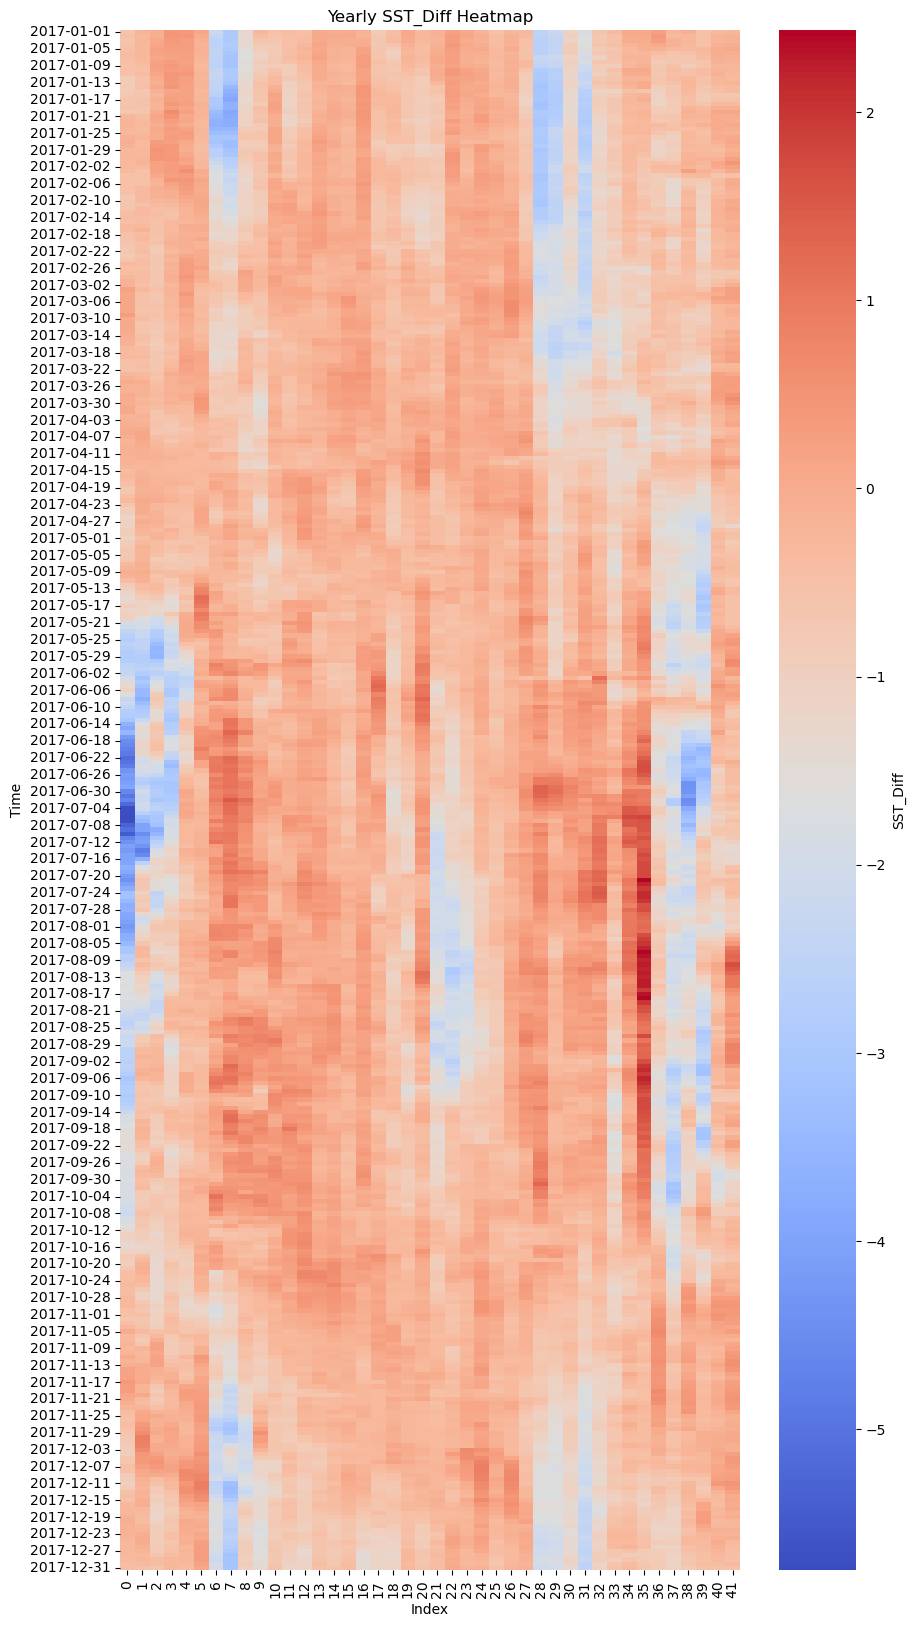

In [4]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import glob

def process_file(filepath):
    ds_new_loaded = xr.open_dataset(filepath)
    df_new_loaded = ds_new_loaded.to_dataframe() 
    df_new_loaded['time'] = pd.to_datetime(df_new_loaded['time']).dt.date

    df_grouped = df_new_loaded.groupby('time').apply(lambda x: x.head(42)).reset_index(drop=True)
    df_grouped['group_index'] = df_grouped.groupby('time').cumcount()

    df_pivot = df_grouped.pivot(index='time', columns='group_index', values='SST_Diff')

    return df_pivot

filepaths = sorted(glob.glob('/home/jovyan/shared/SST_Diff/2017*_sst_diff.nc'))

df_list = []
for filepath in filepaths:
    df_pivot = process_file(filepath)
    df_list.append(df_pivot)

# Concatenate all dataframes along the index (time) axis
df_concat = pd.concat(df_list)

# Create a heatmap plot
plt.figure(figsize=(10, 20))
sns.heatmap(df_concat, cmap='coolwarm', cbar_kws={'label': 'SST_Diff'})
plt.title('Yearly SST_Diff Heatmap')
plt.ylabel('Time')
plt.xlabel('Index')
plt.show()


File /home/jovyan/shared/SST_Diff/198304_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/198802_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/199209_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/199702_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/200111_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/200604_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/201102_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/201506_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/202002_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/202306_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/202307_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST_Diff/202308_sst_diff.nc does not exist, skipping...
File /home/jovyan/shared/SST

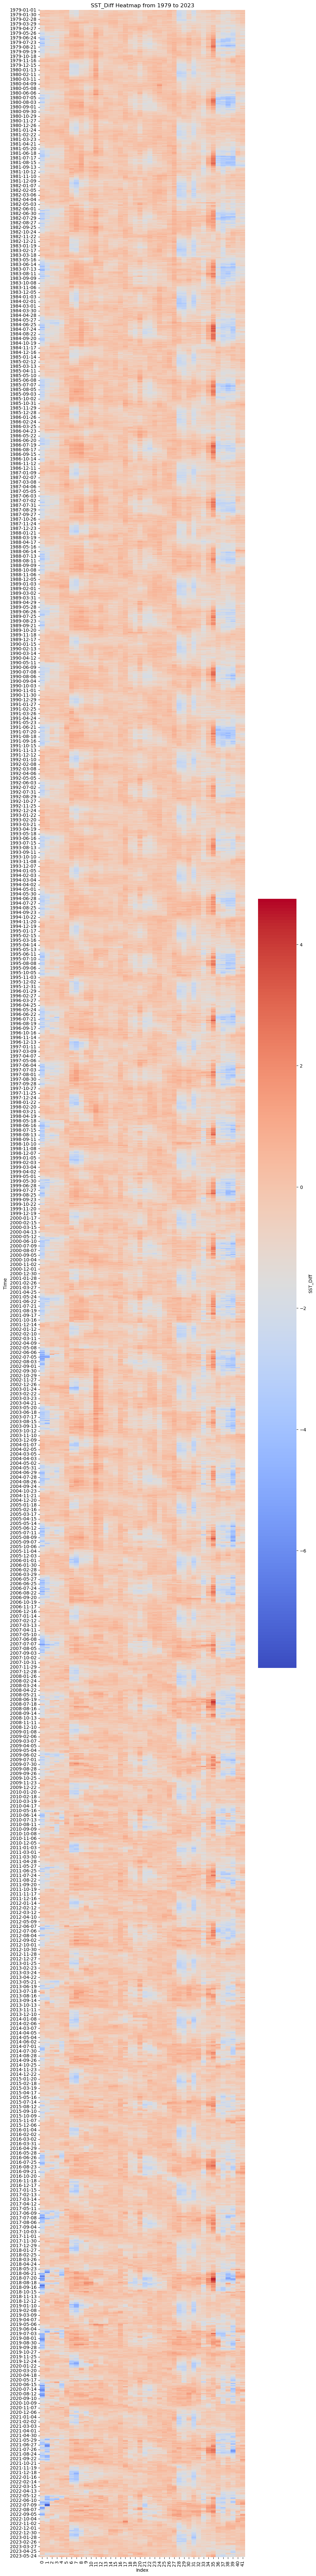

In [7]:
import os

# Get all the years and months between 1979 to 2023
years = list(range(1979, 2024))
months = ['{:02d}'.format(month) for month in range(1, 13)]

df_list = []
for year in years:
    for month in months:
        filepath = f'/home/jovyan/shared/SST_Diff/{year}{month}_sst_diff.nc'
        if os.path.exists(filepath):
            df_pivot = process_file(filepath)
            df_list.append(df_pivot)
        else:
            print(f"File {filepath} does not exist, skipping...")

# Concatenate all dataframes along the index (time) axis
df_concat = pd.concat(df_list)

# Create a heatmap plot
plt.figure(figsize=(10, 100))
sns.heatmap(df_concat, cmap='coolwarm', cbar_kws={'label': 'SST_Diff'})
plt.title('SST_Diff Heatmap from 1979 to 2023')
plt.ylabel('Time')
plt.xlabel('Index')
plt.show()